In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from meanfield import Input, Dense, Model, Network
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_moons

In [2]:
tf.__version__

'1.0.0'

In [3]:
Network.sample_size = 10
Network.target_std_deviation = 0.1 #this feature doesn't affect anything in case of classification
Dense.initial_sigma = -4 #the initial std deviation of weights will be e^-5. 
                        #Higher initial deviation leads to unability to train big networks?

In [4]:
X, y = make_moons(n_samples=100, noise=0.2)

In [5]:
stdx = StandardScaler()
X = stdx.fit(X).transform(X)

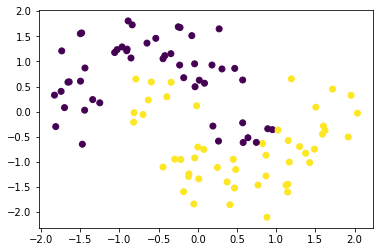

In [6]:
cmap = y
plt.scatter(x=X[:,0],y=X[:,1], c=cmap)
plt.show()

In [7]:
y = OneHotEncoder().fit(y.reshape((-1,1))).transform(y.reshape((-1,1))).toarray()

In [8]:
X, y = np.array(X), np.array(y)

In [9]:
X.shape, y.shape

((100, 2), (100, 2))

In [10]:
inp = Input(2)

d1 = Dense(30, inp, prior=150, act=tf.nn.relu)
d2 = Dense(30, d1, prior=160, act=tf.nn.relu)
d3 = Dense(30, d2, prior=160, act=tf.nn.relu)

out = Dense(2, d3, act=tf.nn.softmax, prior=200)

Tensor("Relu:0", shape=(?, ?, 30), dtype=float32)
Tensor("Relu_1:0", shape=(?, ?, 30), dtype=float32)
Tensor("Relu_2:0", shape=(?, ?, 30), dtype=float32)
Tensor("Reshape_1:0", shape=(?, ?, 2), dtype=float32)


In [11]:
model = Model(input=inp, output=out, optimizer=tf.train.AdamOptimizer(0.001), loss='crossentropy')

In [12]:
for _ in range(760):
    model.fit(X=X, y=y, batchsize=100, nepoch=80, log_freq=80, shuffle_freq=40)
    if _ % 10 == 0:
        print(model.sess.run(d1.sigma))

epoch: 0 
 train error: 0.5 
 objective: 6892.47265625



[[ 0.01990946  0.02006286  0.01986938  0.01971993  0.02017593  0.01988813
   0.01972077  0.01983445  0.01998518  0.0195348   0.0198846   0.0195819
   0.01964132  0.01993639  0.02004934  0.0198344   0.01978     0.01987313
   0.01992971  0.01977132  0.01954259  0.01959445  0.01993478  0.01980362
   0.01992358  0.02005775  0.01986251  0.01995886  0.0200302   0.02002889]
 [ 0.01933615  0.01982066  0.01998281  0.01957582  0.02015944  0.02009651
   0.01995821  0.01968274  0.01989944  0.01968077  0.01984696  0.01980906
   0.01991435  0.01991087  0.0196472   0.01982778  0.01971539  0.01973131
   0.0200447   0.01979475  0.01976378  0.01981682  0.02024829  0.02002176
   0.01968675  0.01959399  0.01961217  0.01982213  0.01959949  0.01990019]]
epoch: 0 
 train error: 0.17 
 objective: 6488.390625



epoch: 0 
 train error: 0.17 
 objective: 6246.94628906



epoch: 0 
 train error: 0.16 
 objective: 6059.62792969



epoch: 0 
 train error: 0

In [13]:
samplesize = 200

In [14]:
base = np.linspace(start=-8, stop=8, num=50, dtype='float32')
X_test = np.array([[x,y] for x in base for y in base])
y_pred = model.predict(X_test, prediction_sample_size=samplesize, return_distrib=False, batchsize=3)

100%|█████████▉| 100.0/100 [02:12<00:00,  1.46s/it]        


In [15]:
pr = y_pred[:,0].reshape((50,50))

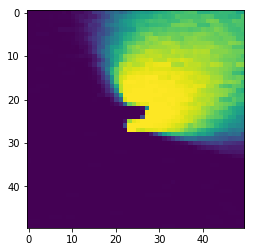

In [16]:
plt.imshow(pr)
plt.show()